# Week 5 Homework 4 (Due on Monday, March 2 at 11:59PM)

This homework assignment aims to build a simple linear regression model using the `radio` feature.

1. Apply the normal equation to calculate parameter values for the best fit.

2. Display the regression line with the training data points.

3. Use `sklearn` to build the same model. Verify that the parameters values are the same as those from the normal equation.

### Simple Linear regression: Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
url = "http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116158668>,
      dtype=object)

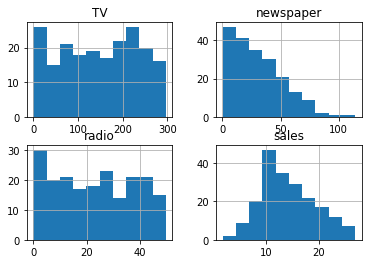

In [5]:
advertising.hist()

### Data Cleaning

In [6]:
# Checking Null values
np.sum(advertising.isnull(), axis=0)

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

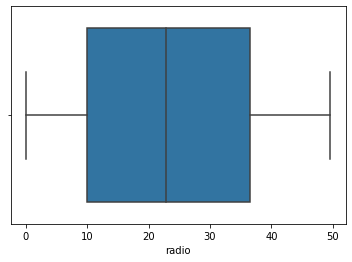

In [7]:
# Outlier Analysis
sns.boxplot(advertising['radio'])

**There are no outliers present.**

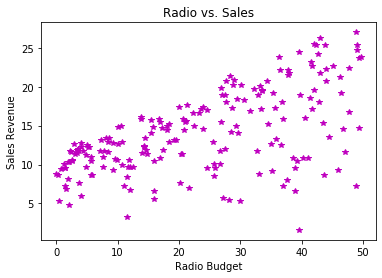

In [153]:
# Plot Radio vs. Sales
plt.plot(advertising['radio'], advertising['sales'], 'm*')
plt.title("Radio vs. Sales")
plt.xlabel("Radio Budget")
plt.ylabel("Sales Revenue")
plt.show()

### Correlation Coefficient

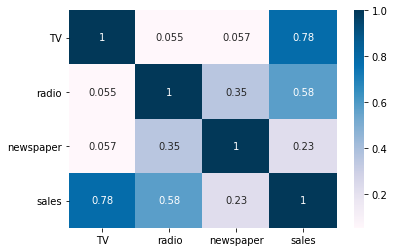

In [151]:
# Correlation between different variables
sns.heatmap(advertising.corr(), cmap="PuBu", annot = True)

In [10]:
np.corrcoef(advertising['radio'], advertising['sales'])[0, 1]

0.5762225745710551

In [11]:
data = advertising[['radio', 'sales']]
data.head()

,radio,sales
1,37.8,22.1
2,39.3,10.4
3,45.9,9.3
4,41.3,18.5
5,10.8,12.9


### Simple Linear regression: Cost Function
- **mean squared error (MSE) function**

In [12]:
def get_squared_error(beta0, beta1, xi, yi):
    predict_fx = beta0 + beta1 * xi
    squared_error = (yi - predict_fx) ** 2

    return squared_error

In [13]:
# beta0 = 5
# beta1 = 0.1
get_squared_error(5, 0.1, 37.8, 22.1)

177.42240000000007

In [14]:
# Create a list that contains value of (y_1 - f(x_1))^2 for i=1,...,200.
list_errors = []
for ind in data.index:
    xi = data.loc[ind, 'radio']
    yi = data.loc[ind, 'sales']
    squared_error = get_squared_error(5, 0.1, xi, yi)
    list_errors.append(squared_error)
print(len(list_errors))

200


In [15]:
# Calculate MSE(5, 0.1)
MSE = np.mean(list_errors)
print("MSE:", MSE)

MSE: 65.234253


In [16]:
# Write a function MSE(beta0, beta1, data) that returns the value of MSE with given beta0 and beta1.
def get_MSE(beta0, beta1, data):
    # Calculate the list of squared errors
    list_errors = []
    for ind in data.index:
        xi = data.loc[ind, 'radio']
        yi = data.loc[ind, 'sales']
        squared_error = get_squared_error(beta0, beta1, xi, yi)
        list_errors.append(squared_error)
    # Calculate the average
    MSE = np.mean(list_errors)
    return MSE

In [17]:
# Calculate MSE(7, 0.05) using MSE().
# beta0 = 7
# beta1 = 0.05

get_MSE(7, 0.05, data)

57.52420325

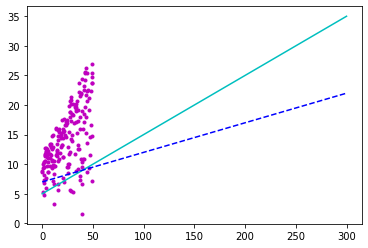

In [150]:
# Plot the data as a scatter plot.
plt.plot(data['radio'], data['sales'], 'm.')
# Plot the line y = 5 + 0.1x.
x_coordinates = np.array([0, 300])
y_coordinates = x_coordinates * 0.1 + 5
plt.plot(x_coordinates, y_coordinates, 'c-')
# Plot the line y = 7 + 0.05x.
y_coordinates = x_coordinates * 0.05 + 7
plt.plot(x_coordinates, y_coordinates, 'b--')

### Simple Linear Regression: Training Algorithm

**1. Apply the normal equation to calculate parameter values for the best fit.**

In [19]:
# Construct X and y as numpy arrays
X = np.hstack([np.ones([len(data), 1]), data[['radio']].values])
y = data[['sales']].values
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(beta)

[[9.3116381 ]
 [0.20249578]]


In [20]:
get_MSE(9.31, 0.202, data)

18.0926251572

**2. Display the regression line with the training data points.**

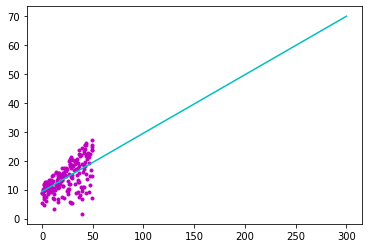

In [147]:
# Plot the data points and the optimal regression line.
plt.plot(data['radio'], data['sales'], 'm.')
x_coordinates = np.array([0, 300])
y_coordinates = x_coordinates * 0.202 + 9.31 
plt.plot(x_coordinates, y_coordinates, 'c-')

The graph below is the same one as the one above but has a smaller range between 0-100 vs 0-300, the data points are more spread out.

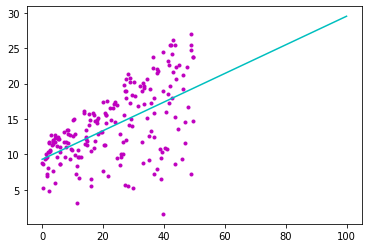

In [149]:
# Plot the data points and the optimal regression line.
plt.plot(data['radio'], data['sales'], 'm.')
x_coordinates = np.array([0, 100])
y_coordinates = x_coordinates * 0.202 + 9.31 
plt.plot(x_coordinates, y_coordinates, 'c-')

### Building Model

**3. Use sklearn to build the same model. Verify that the parameters values are the same as those from the normal equation.**

In [23]:
# Find the results using LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(data[['radio']], data[['sales']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# The coef_ and intercept_ attributes contain parameter values
print(lr.coef_)
print(lr.intercept_)

[[0.20249578]]
[9.3116381]


In [95]:
print(beta)

[[9.3116381 ]
 [0.20249578]]


**In conclusion the parameter values are the same as those from the normal equation.**